<a href="https://colab.research.google.com/github/viniciusgomesbatista/Steel_Industry_Energy_Consumption/blob/main/Steel%20Industry%20Energy%20Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import

In [ ]:
pip install qrcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 635.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import qrcode

In [ ]:
data = input("Cole o que você quer criar como qr code.") #criando a variável
img = qrcode.make(data) #gerando o qr code
img.save('Qrcode.png') #salvando o qrcode

Cole o que você quer criar como qr code.tet


# Steel Industry Energy Consumption

https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption

Esta empresa produz diversos tipos de bobinas, chapas de aço e chapas de ferro. As informações sobre o consumo de eletricidade são mantidas em um sistema baseado em nuvem. As informações sobre o consumo de energia da indústria são armazenadas no site da Korea Electric Power Corporation (pccs.kepco.go.kr), e as perspectivas dos dados diários, mensais e anuais são calculadas e apresentadas.

Attribute Information:
* Date: Dados em tempo contínuo obtidos no primeiro dia do mês
* Usage_kWh: Consumo de energia da indústria kWh contínuo
* Lagging Current: Potência reativa atual Contínuo kVarh
* Leading Current: Potência reativa de corrente principal kVarh contínuo
* CO2: Contínua ppm
* NSM Number of Seconds: Número de segundos a partir da meia-noite Contínuo S
* Week status: Categórico (Fim de semana (0) ou Dia da semana(1))
* Day of week: categórico, segunda-feira: sábado
* Load Type: Carga Leve Categórica, Carga Média, Carga Máxima

In [ ]:
import numpy as np                                    # Numpy
import pandas as pd                                   # Pandas
from sklearn.model_selection import train_test_split  # Scikit separar treino/teste

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Treinamentos/Python para Engenheiros/Steel_industry_data.csv')

# Exploração dos dados

In [ ]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [ ]:
df.tail()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      WeekStatus Day_of_week   Load_Type  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load

In [ ]:
display(df)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

In [ ]:
df.sample(5)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
30694  16/11/2018 17:45      36.29                                 11.95   
19272  20/07/2018 18:15      42.01                                 19.73   
19119  19/07/2018 04:00       2.74                                  4.90   
7285   17/03/2018 21:30       4.03                                  0.00   
21589  13/08/2018 21:30       4.61                                  0.00   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
30694                                  0.00       0.02   
19272                                  1.44       0.02   
19119                                  0.00       0.00   
7285                                  26.71       0.00   
21589                                 13.93       0.00   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
30694                         94.98                        100.00  63900   
19272                         90.51                         99.94  65700   
19119                         48.81                        100.00  14400   
7285                         100.00                         14.92  77400   
21589                        100.00                         31.42  77400   

      WeekStatus Day_of_week     Load_Type  
30694    Weekday      Friday  Maximum_Load  
19272    Weekday      Friday   Medium_Load  
19119    Weekday    Thursday    Light_Load  
7285     Weekend    Saturday   Medium_Load  
21589    Weekday      Monday   Medium_Load

In [ ]:
df.shape

(35040, 11)

In [ ]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df.describe()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive.Power_kVarh   0.896150   
Leading_Current_Reactive_Power_kVarh  -0.324922   
CO2(tCO2)                              0.988180   
Lagging_Current_Power_Factor           0.385960   
Leading_Current_Power_Factor           0.353566   
NSM                                    0.234610   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                         0.896150   
Lagging_Current_Reactive.Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.405142   
CO2(tCO2)                                                         0.886948   
Lagging_Current_Power_Factor                                      0.144534   
Leading_Current_Power_Factor                                      0.407716   
NSM                                                               0.082662   

                                      Leading_Current_Reactive_Power_kVarh  \
Usage_kWh                                                        -0.324922   
Lagging_Current_Reactive.Power_kVarh                             -0.405142   
Leading_Current_Reactive_Power_kVarh                              1.000000   
CO2(tCO2)                                                        -0.332777   
Lagging_Current_Power_Factor                                      0.526770   
Leading_Current_Power_Factor                                     -0.944039   
NSM                                                               0.371605   

                                      CO2(tCO2)  Lagging_Current_Power_Factor  \
Usage_kWh                              0.988180                      0.385960   
Lagging_Current_Reactive.Power_kVarh   0.886948                      0.144534   
Leading_Current_Reactive_Power_kVarh  -0.332777                      0.526770   
CO2(tCO2)                              1.000000                      0.379605   
Lagging_Current_Power_Factor           0.379605                      1.000000   
Leading_Current_Power_Factor           0.360019                     -0.519967   
NSM                                    0.231726                      0.565270   

                                      Leading_Current_Power_Factor       NSM  
Usage_kWh                                                 0.353566  0.234610  
Lagging_Current_Reactive.Power_kVarh                      0.407716  0.082662  
Leading_Current_Reactive_Power_kVarh                     -0.944039  0.371605  
CO2(tCO2)                                                 0.360019  0.231726  
Lagging_Current_Power_Factor                             -0.519967  0.565270  
Leading_Current_Power_Factor                              1.000000 -0.360563  
NSM                                                      -0.360563  1.000000

# Pandas

## iloc

In [ ]:
df.iloc[240]

date                                    03/01/2018 12:15
Usage_kWh                                          11.27
Lagging_Current_Reactive.Power_kVarh                 0.5
Leading_Current_Reactive_Power_kVarh               20.45
CO2(tCO2)                                           0.01
Lagging_Current_Power_Factor                        99.9
Leading_Current_Power_Factor                       48.27
NSM                                                44100
WeekStatus                                       Weekday
Day_of_week                                    Wednesday
Load_Type                                    Medium_Load
Name: 240, dtype: object

In [ ]:
df.iloc[[240]] #tudo numa linha

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
240  03/01/2018 12:15      11.27                                   0.5   

     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
240                                 20.45       0.01   

     Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
240                          99.9                         48.27  44100   

    WeekStatus Day_of_week    Load_Type  
240    Weekday   Wednesday  Medium_Load

In [ ]:
df.iloc[[240,241,242,243]]

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
240  03/01/2018 12:15      11.27                                   0.5   
241  03/01/2018 12:30       8.21                                   0.0   
242  03/01/2018 12:45       8.14                                   0.0   
243  03/01/2018 13:00       7.70                                   0.0   

     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
240                                 20.45       0.01   
241                                 26.21       0.00   
242                                 25.56       0.00   
243                                 25.74       0.00   

     Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
240                          99.9                         48.27  44100   
241                         100.0                         29.89  45000   
242                         100.0                         30.34  45900   
243                         100.0                         28.66  46800   

    WeekStatus Day_of_week    Load_Type  
240    Weekday   Wednesday  Medium_Load  
241    Weekday   Wednesday  Medium_Load  
242    Weekday   Wednesday  Medium_Load  
243    Weekday   Wednesday  Medium_Load

In [ ]:
df.iloc[240:244]

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
240  03/01/2018 12:15      11.27                                   0.5   
241  03/01/2018 12:30       8.21                                   0.0   
242  03/01/2018 12:45       8.14                                   0.0   
243  03/01/2018 13:00       7.70                                   0.0   

     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
240                                 20.45       0.01   
241                                 26.21       0.00   
242                                 25.56       0.00   
243                                 25.74       0.00   

     Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
240                          99.9                         48.27  44100   
241                         100.0                         29.89  45000   
242                         100.0                         30.34  45900   
243                         100.0                         28.66  46800   

    WeekStatus Day_of_week    Load_Type  
240    Weekday   Wednesday  Medium_Load  
241    Weekday   Wednesday  Medium_Load  
242    Weekday   Wednesday  Medium_Load  
243    Weekday   Wednesday  Medium_Load

In [ ]:
df['Usage_kWh'].iloc[200]

4.61

## loc

In [ ]:
df.loc[df['Day_of_week']=='Monday']

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[5088 rows x 11 columns]

In [ ]:
df.loc[(df['Day_of_week']=='Monday') \
     & (df['Load_Type']=='Medium_Load')]

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
708    08/01/2018 09:15     108.04                                 30.56   
709    08/01/2018 09:30      95.26                                 27.58   
710    08/01/2018 09:45     136.15                                 51.37   
711    08/01/2018 10:00     108.97                                 47.23   
720    08/01/2018 12:15       9.65                                  0.72   
...                 ...        ...                                   ...   
34355  24/12/2018 21:00       4.18                                  0.00   
34356  24/12/2018 21:15       4.18                                  0.00   
34357  24/12/2018 21:30       4.14                                  0.00   
34358  24/12/2018 21:45       4.18                                  0.00   
34359  24/12/2018 22:00       5.40                                  0.00   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
708                                    0.00       0.05   
709                                    0.00       0.04   
710                                    0.00       0.06   
711                                    0.00       0.05   
720                                   20.63       0.00   
...                                     ...        ...   
34355                                 21.46       0.00   
34356                                 21.24       0.00   
34357                                 21.38       0.00   
34358                                 21.42       0.00   
34359                                 21.13       0.00   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
708                           96.22                        100.00  33300   
709                           96.06                        100.00  34200   
710                           93.56                        100.00  35100   
711                           91.75                        100.00  36000   
720                           99.72                         42.37  44100   
...                             ...                           ...    ...   
34355                        100.00                         19.12  75600   
34356                        100.00                         19.31  76500   
34357                        100.00                         19.01  77400   
34358                        100.00                         19.15  78300   
34359                        100.00                         24.76  79200   

      WeekStatus Day_of_week    Load_Type  
708      Weekday      Monday  Medium_Load  
709      Weekday      Monday  Medium_Load  
710      Weekday      Monday  Medium_Load  
711      Weekday      Monday  Medium_Load  
720      Weekday      Monday  Medium_Load  
...          ...         ...          ...  
34355    Weekday      Monday  Medium_Load  
34356    Weekday      Monday  Medium_Load  
34357    Weekday      Monday  Medium_Load  
34358    Weekday      Monday  Medium_Load  
34359    Weekday      Monday  Medium_Load  

[1600 rows x 11 columns]

## Group by

In [ ]:
df.groupby('Day_of_week').sum()

<ipython-input-22-4b32fd13a71c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Day_of_week').sum()


Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
Day_of_week                                                    
Friday       165709.51                              80390.92   
Monday       168636.34                              81949.72   
Saturday      79467.75                              31498.95   
Sunday        37667.80                              16152.28   
Thursday     175279.52                              86644.68   
Tuesday      171862.65                              82919.10   
Wednesday    161013.14                              77204.19   

             Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
Day_of_week                                                    
Friday                                   13073.88      71.58   
Monday                                   12932.74      72.88   
Saturday                                 30994.88      30.65   
Sunday                                   38234.19      10.21   
Thursday                                 11817.78      76.35   
Tuesday                                  12526.60      72.82   
Wednesday                                16057.97      69.32   

             Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
Day_of_week                                                               
Friday                          398603.31                     453363.15   
Monday                          405097.37                     461217.03   
Saturday                        410475.10                     371146.96   
Sunday                          410201.00                     319600.95   
Thursday                        397173.09                     458383.80   
Tuesday                         399761.90                     453482.11   
Wednesday                       402143.32                     439056.16   

                   NSM  
Day_of_week             
Friday       213408000  
Monday       217512000  
Saturday     213408000  
Sunday       213408000  
Thursday     213408000  
Tuesday      213408000  
Wednesday    213408000

In [ ]:
df.groupby('Day_of_week').mean()

<ipython-input-23-196b033323f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Day_of_week').mean()


Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
Day_of_week                                                    
Friday       33.195014                             16.103950   
Monday       33.143935                             16.106470   
Saturday     15.919020                              6.309886   
Sunday        7.545633                              3.235633   
Thursday     35.112083                             17.356707   
Tuesday      34.427614                             16.610397   
Wednesday    32.254235                             15.465583   

             Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
Day_of_week                                                    
Friday                                   2.618966   0.014339   
Monday                                   2.541812   0.014324   
Saturday                                 6.208910   0.006140   
Sunday                                   7.659093   0.002045   
Thursday                                 2.367344   0.015294   
Tuesday                                  2.509335   0.014587   
Wednesday                                3.216741   0.013886   

             Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
Day_of_week                                                               
Friday                          79.848419                     90.817939   
Monday                          79.618194                     90.648001   
Saturday                        82.226583                     74.348349   
Sunday                          82.171675                     64.022626   
Thursday                        79.561917                     91.823678   
Tuesday                         80.080509                     90.841769   
Wednesday                       80.557556                     87.951955   

                 NSM  
Day_of_week           
Friday       42750.0  
Monday       42750.0  
Saturday     42750.0  
Sunday       42750.0  
Thursday     42750.0  
Tuesday      42750.0  
Wednesday    42750.0

In [ ]:
df.groupby(['Day_of_week', 'Load_Type']).mean().head()

<ipython-input-24-0e4769501cf9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Day_of_week', 'Load_Type']).mean().head()


Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
Day_of_week Load_Type                                                       
Friday      Light_Load    11.361442                              9.553011   
            Maximum_Load  61.043700                             27.883983   
            Medium_Load   42.220494                             16.243713   
Monday      Light_Load     8.805459                              7.635354   
            Maximum_Load  66.278233                             31.238475   

                          Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
Day_of_week Load_Type                                                       
Friday      Light_Load                                0.849156   0.003878   
            Maximum_Load                              0.890558   0.027758   
            Medium_Load                               6.339913   0.018606   
Monday      Light_Load                                1.115039   0.002688   
            Maximum_Load                              0.764992   0.030283   

                          Lagging_Current_Power_Factor  \
Day_of_week Load_Type                                    
Friday      Light_Load                       64.907974   
            Maximum_Load                     90.208158   
            Medium_Load                      92.547025   
Monday      Light_Load                       65.463580   
            Maximum_Load                     89.706533   

                          Leading_Current_Power_Factor           NSM  
Day_of_week Load_Type                                                 
Friday      Light_Load                       95.798052  23206.204380  
            Maximum_Load                     97.932025  53106.000000  
            Medium_Load                      78.659619  61758.000000  
Monday      Light_Load                       94.003024  24026.223776  
            Maximum_Load                     98.155092  53106.000000

# Análises

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-26-7e0dcbc683ab>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_the_week_average_usage_data = df.groupby(pd.Grouper(key="WeekStatus")).mean() #agrupamento por média


<Axes: xlabel='WeekStatus'>

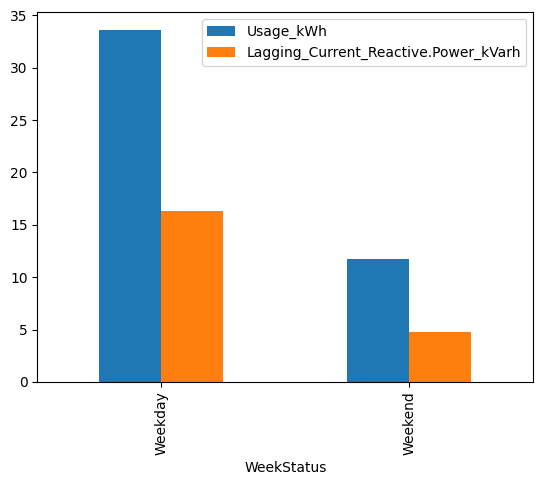

In [ ]:
# Consumo por tipo de dia
day_of_the_week_average_usage_data = df.groupby(pd.Grouper(key="WeekStatus")).mean() #agrupamento por média
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","Lagging_Current_Reactive.Power_kVarh"], kind="bar")

<ipython-input-27-5d5522d8745b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_the_week_average_usage_data = df.groupby(pd.Grouper(key="Day_of_week")).mean() #agrupando por dia semana e média


<Axes: xlabel='Day_of_week'>

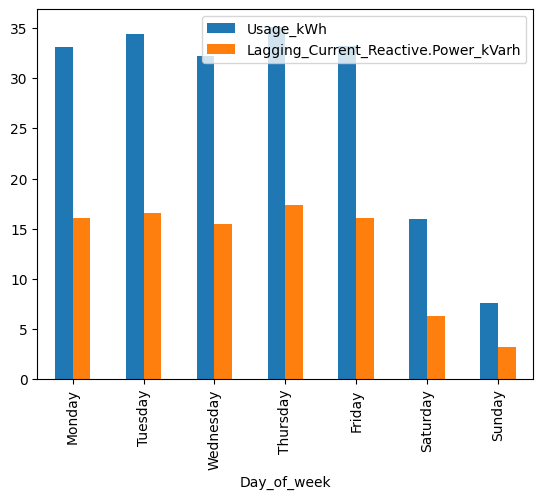

In [ ]:
#Analisar consumo pelo dia da semana
day_of_the_week_average_usage_data = df.groupby(pd.Grouper(key="Day_of_week")).mean() #agrupando por dia semana e média
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","Lagging_Current_Reactive.Power_kVarh"], kind="bar") #visualizando os dados no seaborn

In [ ]:
#criando um dicionário para renomear as colunas
dicio = {'Lagging_Current_Reactive.Power_kVarh':'LCR','Leading_Current_Reactive_Power_kVarh':'LCRP',
         'Lagging_Current_Power_Factor': 'LagCPF', 'Leading_Current_Power_Factor':'LegCPF'}

#criando um novo dataframe igual ao anterior
df_1 = df
df_1.rename(columns=dicio,inplace=True)

In [ ]:
# Criar colunas de dia, mês e ano
df_1['day'] = pd.to_datetime(df['date']).dt.day
df_1['month'] = pd.to_datetime(df['date']).dt.month
df_1['year'] = pd.to_datetime(df['date']).dt.year

<ipython-input-42-c11f3b6b5ac9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_the_week_average_usage_data = df_1.groupby(pd.Grouper(key="month")).mean()


<Axes: xlabel='month'>

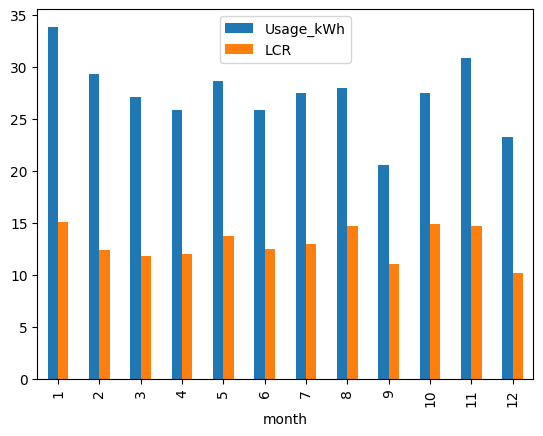

In [ ]:
#criando uma análise por mês
day_of_the_week_average_usage_data = df_1.groupby(pd.Grouper(key="month")).mean()
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","LCR"], kind="bar")

<ipython-input-32-e765a939eef4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_the_week_average_usage_data = df_1.groupby(pd.Grouper(key="day")).mean().sort_values('day')


<Axes: xlabel='day'>

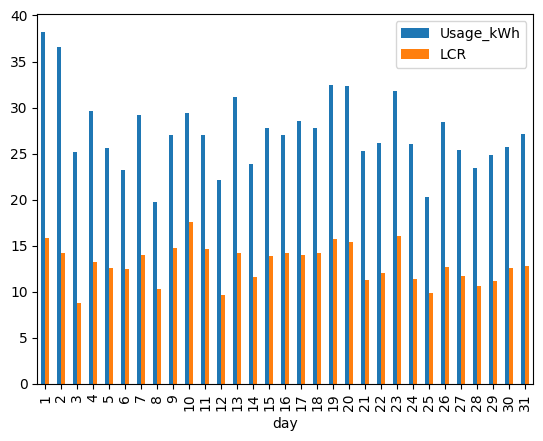

In [ ]:
#criando uma análise pelo dia
day_of_the_week_average_usage_data = df_1.groupby(pd.Grouper(key="day")).mean().sort_values('day')
day_of_the_week_average_usage_data.head()
day_of_the_week_average_usage_data.plot(y=["Usage_kWh","LCR"], kind="bar")

<ipython-input-43-b55052f78133>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


<Figure size 1500x800 with 0 Axes>

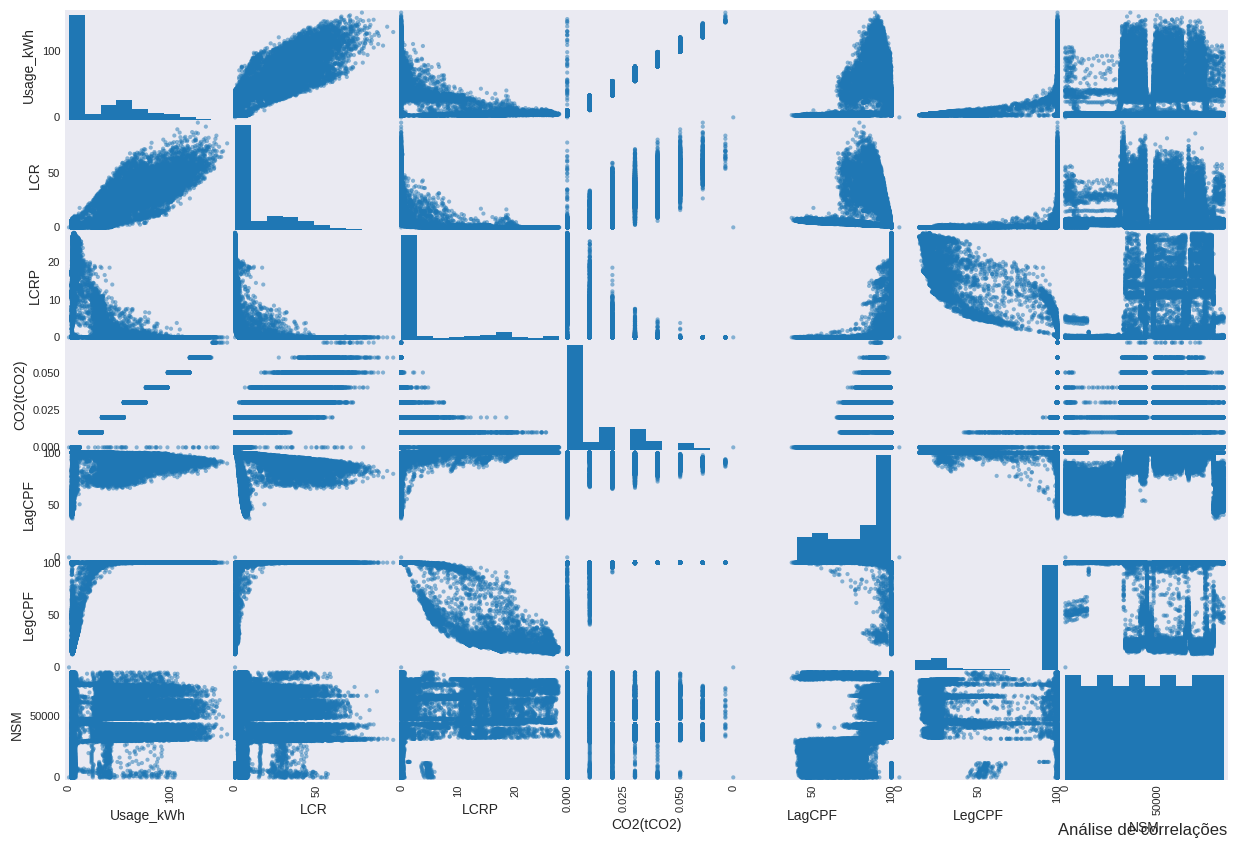

In [ ]:
#Análises de correlação
# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')
columns=['date', 'Usage_kWh', 'LCR', 'LCRP', 'CO2(tCO2)', 'LagCPF', 'LegCPF',
       'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type']
pd.plotting.scatter_matrix(df_1[columns], figsize=(15,10));
plt.savefig('variaveis.png')
plt.annotate('Análise de correlações', xy=(1, -0.50), xycoords='axes fraction', ha='right', fontsize=12);

<ipython-input-33-9d69e4b20778>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-33-9d69e4b20778>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)


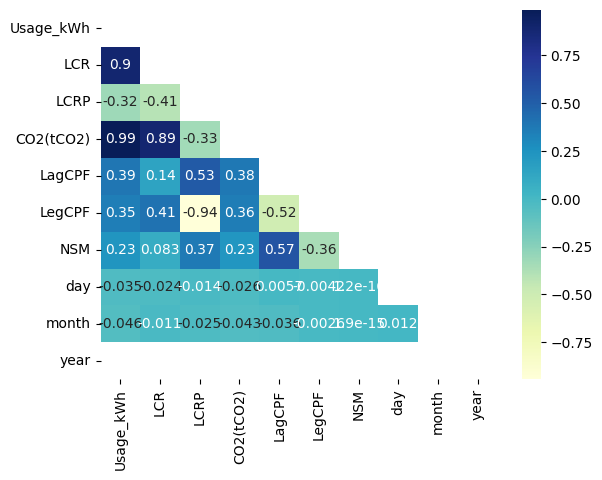

In [ ]:
#Mapa de calor das correlações
mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)

# Pygwalker

In [ ]:
pip install pygwalker

In [ ]:
import pygwalker as pyg

In [ ]:
walker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-2" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

#Modelo preditivo

O CRISP-DM (Cross-Industry Standard Process for Data Mining) é um modelo de processo amplamente utilizado para guiar projetos de mineração de dados. Ele fornece uma estrutura sistemática e iterativa para conduzir projetos de descoberta de conhecimento em bases de dados.

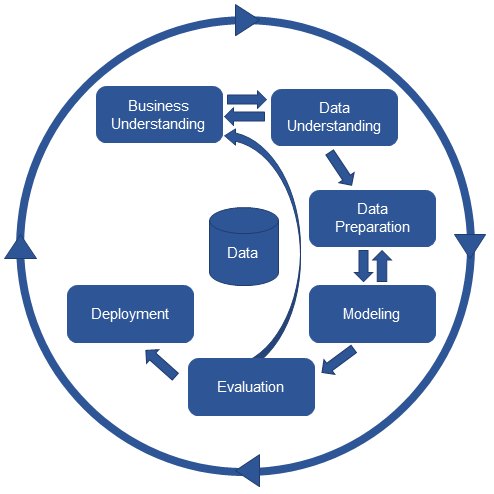

## Regressão Linear

Usada para prever uma variável chamada de variável dependente (ou resposta) com base no valor de uma ou mais variáveis chamadas de variáveis independentes (ou preditoras).

A regressão linear assume que existe uma relação linear entre a variável dependente e as variáveis independentes, o que significa que as mudanças na variável dependente são proporcionais às mudanças nas variáveis independentes.

In [ ]:
#definindo variáveis
df_lm = df[['Usage_kWh', 'LCR', 'LCRP', 'CO2(tCO2)',
       'LagCPF', 'LegCPF', 'NSM','day', 'month']]
y = df_lm['Usage_kWh']
x = df_lm.drop('Usage_kWh', axis =1)

In [ ]:
#Instaciando o modelo
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [ ]:
#Divindo as variáveis de treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split ( x , y , test_size = 0.3 , random_state= 123)

In [ ]:
#Treinando Modelo
lm.fit(x_train , y_train)

LinearRegression()

In [ ]:
#Gerando predições
pred = lm.predict(x_test)

In [ ]:
#Medindo acurácia
lm.score(x_test, y_test)

0.9809716850198613

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse

21.041624127700214

In [ ]:
rmse = np.sqrt(mse)
rmse

4.5871150113879

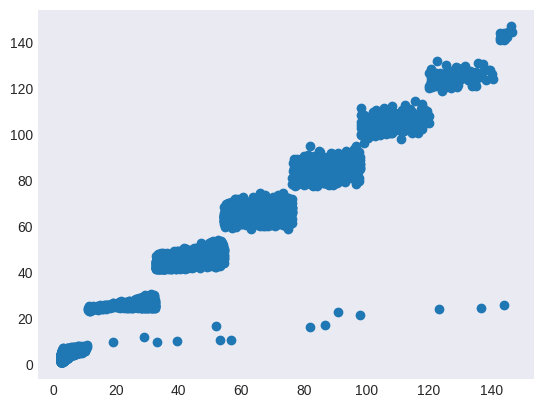

In [ ]:
#correlação entre o valor previsto e o variável dependente de teste
plt.scatter(y_test, pred)
plt.show()

## PyCaret

In [ ]:
pip install pycaret

In [ ]:
import pycaret                                        # Pycaret
from pycaret.regression import *                      # Pycaret para Regressão

In [ ]:
#separando base em treino e teste
train, test = train_test_split(df, test_size=0.3,
                                     random_state=42)

In [ ]:
#configurar o setup
reg = setup(data = train,           # Banco de dados
              target = 'Usage_kWh',   # Desfecho que estamos tentando prever
              train_size = 0.7)     # Proporção do banco de treino

In [ ]:
# Treinar modelos
best = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

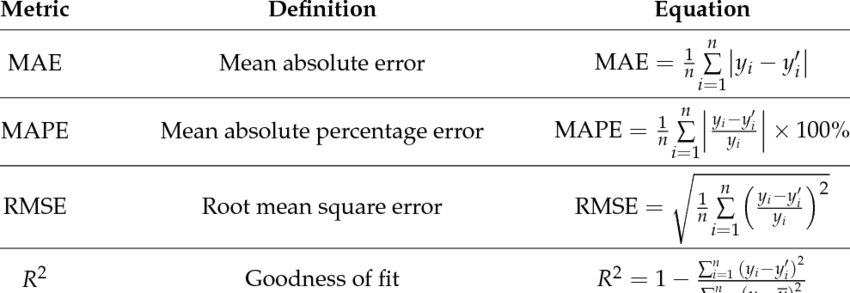

## Analisando o modelo

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

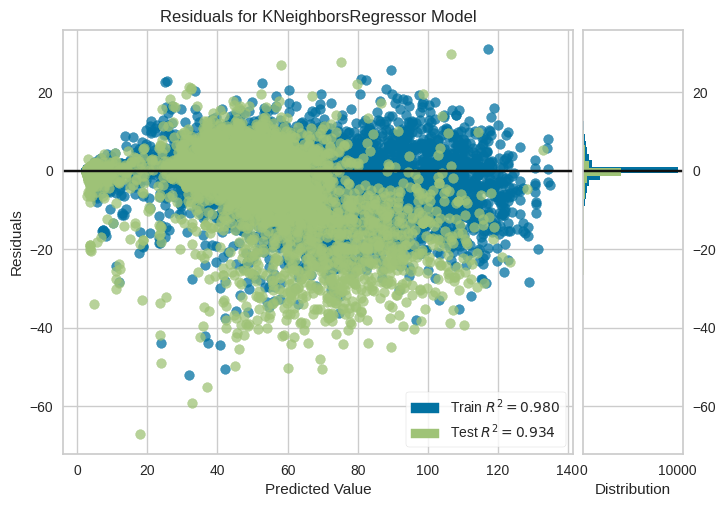

In [ ]:
plot_model(best, plot = 'residuals')

## Predição

In [ ]:
#criar previsão
predict_model(best)

date        LCR   LCRP  CO2(tCO2)      LagCPF      LegCPF  \
14677  02/06/2018 21:30   0.000000  16.24       0.00  100.000000   19.160000   
3889   10/02/2018 12:30   0.000000  26.42       0.00  100.000000   17.590000   
10543  20/04/2018 20:00   0.000000  12.10       0.01  100.000000   90.449997   
14626  02/06/2018 08:45  11.120000   0.00       0.00   64.400002  100.000000   
15946  16/06/2018 02:45   5.000000   0.00       0.00   49.389999  100.000000   
...                 ...        ...    ...        ...         ...         ...   
2440   26/01/2018 10:15  35.599998   0.00       0.05   94.620003  100.000000   
33545  16/12/2018 10:30  36.180000   0.00       0.03   89.400002  100.000000   
28823  28/10/2018 06:00   5.040000   0.00       0.00   49.090000  100.000000   
5605   28/02/2018 09:30  37.759998   0.00       0.04   91.080002  100.000000   
13893  25/05/2018 17:30   3.530000   2.92       0.02   99.419998   99.599998   

         NSM WeekStatus Day_of_week     Load_Type  day  month  year  \
14677  77400    Weekend    Saturday    Light_Load    6      2  2018   
3889   45000    Weekend    Saturday    Light_Load    2     10  2018   
10543  72000    Weekday      Friday   Medium_Load   20      4  2018   
14626  31500    Weekend    Saturday    Light_Load    6      2  2018   
15946   9900    Weekend    Saturday    Light_Load   16      6  2018   
...      ...        ...         ...           ...  ...    ...   ...   
2440   36900    Weekday      Friday  Maximum_Load   26      1  2018   
33545  37800    Weekend      Sunday  Maximum_Load   16     12  2018   
28823  21600    Weekend      Sunday    Light_Load   28     10  2018   
5605   34200    Weekday   Wednesday   Medium_Load   28      2  2018   
13893  63000    Weekday      Friday   Medium_Load   25      5  2018   

        Usage_kWh  prediction_label  
14677    3.170000          3.132000  
3889     4.720000          4.932000  
10543   25.670000         37.058002  
14626    9.360000          2.916000  
15946    2.840000          2.902000  
...           ...               ...  
2440   104.080002         73.331993  
33545   72.180000         71.143997  
28823    2.840000          2.858000  
5605    83.300003         62.655998  
13893   32.720001         37.355999  

[7359 rows x 15 columns]

In [ ]:
#criando uma nova linha para rodar o modelo
novos_dados = df.iloc[[0]]

In [ ]:
#prever o consumo de energia a partir dos novos dados inputados
predictions = predict_model(best, data=novos_dados)

In [ ]:
#ver predição
predictions

date   LCR  LCRP  CO2(tCO2)     LagCPF  LegCPF  NSM WeekStatus  \
0  01/01/2018 00:15  2.95   0.0        0.0  73.209999   100.0  900    Weekday   

  Day_of_week   Load_Type  day  month  year  Usage_kWh  prediction_label  
0      Monday  Light_Load    1      1  2018       3.17              3.75

## Salvando modelo

In [ ]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LCR', 'LCRP', 'CO2(tCO2)',
                                              'LagCPF', 'LegCPF', 'NSM', 'day',
                                              'month', 'year'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('ca...
                                     

## Carregando o modelo de volta para o ambiente

In [ ]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LCR', 'LCRP', 'CO2(tCO2)',
                                             'LagCPF', 'LegCPF', 'NSM', 'day',
                                             'month', 'year'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('ca.